In [1]:
# Sys path
from sys import path
from pathlib import Path

module_path = str(Path.cwd().parents[1])

if module_path not in path:
    path.append(module_path)
    
path.append(module_path + '\\functions')


# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

import data_preparation, mrmr
from classification import LR, KNN, RF, XGB

from sklearn.metrics import f1_score, roc_auc_score

from sklearn.metrics import plot_confusion_matrix

import time
import pickle
import json

# Dataset

In [2]:
df, X, y = data_preparation.load_dataset(module_path + '\\dataset\\multi_attack_FDI_SLC.csv')
#X = X.iloc[:100,:]
#y = y.iloc[:100]
X.head()

,U1 - SCADA,U2 - SCADA,U3 - SCADA,U4 - SCADA,U5 - SCADA,U6 - SCADA,U7 - SCADA,U8 - SCADA,U9 - SCADA,U10 - SCADA,U11 - SCADA,U12 - SCADA,U13 - SCADA,U14 - SCADA,P2 - SCADA,P3 - SCADA,P4 - SCADA,P5 - SCADA,P6 - SCADA,P7 - SCADA,P8 - SCADA,P9 - SCADA,P10 - SCADA,P11 - SCADA,P12 - SCADA,P13 - SCADA,P14 - SCADA,Q2 - SCADA,Q3 - SCADA,Q4 - SCADA,Q5 - SCADA,Q6 - SCADA,Q7 - SCADA,Q8 - SCADA,Q9 - SCADA,Q10 - SCADA,Q11 - SCADA,Q12 - SCADA,Q13 - SCADA,Q14 - SCADA,U1 - EM - EKF,U2 - EM - EKF,U3 - EM - EKF,U4 - EM - EKF,U5 - EM - EKF,U6 - EM - EKF,U7 - EM - EKF,U8 - EM - EKF,U9 - EM - EKF,U10 - EM - EKF,U11 - EM - EKF,U12 - EM - EKF,U13 - EM - EKF,U14 - EM - EKF,P2 - EM - EKF,P3 - EM - EKF,P4 - EM - EKF,P5 - EM - EKF,P6 - EM - EKF,P7 - EM - EKF,P8 - EM - EKF,P9 - EM - EKF,P10 - EM - EKF,P11 - EM - EKF,P12 - EM - EKF,P13 - EM - EKF,P14 - EM - EKF,Q2 - EM - EKF,Q3 - EM - EKF,Q4 - EM - EKF,Q5 - EM - EKF,Q6 - EM - EKF,Q7 - EM - EKF,Q8 - EM - EKF,Q9 - EM - EKF,Q10 - EM - EKF,Q11 - EM - EKF,Q12 - EM - EKF,Q13 - EM - EKF,Q14 - EM - EKF,U1 - FM - EKF,U2 - FM - EKF,U3 - FM - EKF,U4 - FM - EKF,U5 - FM - EKF,U6 - FM - EKF,U7 - FM - EKF,U8 - FM - EKF,U9 - FM - EKF,U10 - FM - EKF,U11 - FM - EKF,U12 - FM - EKF,U13 - FM - EKF,U14 - FM - EKF,P2 - FM - EKF,P3 - FM - EKF,P4 - FM - EKF,P5 - FM - EKF,P6 - FM - EKF,P7 - FM - EKF,P8 - FM - EKF,P9 - FM - EKF,P10 - FM - EKF,P11 - FM - EKF,P12 - FM - EKF,P13 - FM - EKF,P14 - FM - EKF,Q2 - FM - EKF,Q3 - FM - EKF,Q4 - FM - EKF,Q5 - FM - EKF,Q6 - FM - EKF,Q7 - FM - EKF,Q8 - FM - EKF,Q9 - FM - EKF,Q10 - FM - EKF,Q11 - FM - EKF,Q12 - FM - EKF,Q13 - FM - EKF,Q14 - FM - EKF,U1 - ES - EKF,U2 - ES - EKF,U3 - ES - EKF,U4 - ES - EKF,U5 - ES - EKF,U6 - ES - EKF,U7 - ES - EKF,U8 - ES - EKF,U9 - ES - EKF,U10 - ES - EKF,U11 - ES - EKF,U12 - ES - EKF,U13 - ES - EKF,U14 - ES - EKF,ph2 - ES - EKF,ph3 - ES - EKF,ph4 - ES - EKF,ph5 - ES - EKF,ph6 - ES - EKF,ph7 - ES - EKF,ph8 - ES - EKF,ph9 - ES - EKF,ph10 - ES - EKF,ph11 - ES - EKF,ph12 - ES - EKF,ph13 - ES - EKF,ph14 - ES - EKF,U1 - FS - EKF,U2 - FS - EKF,U3 - FS - EKF,U4 - FS - EKF,U5 - FS - EKF,U6 - FS - EKF,U7 - FS - EKF,U8 - FS - EKF,U9 - FS - EKF,U10 - FS - EKF,U11 - FS - EKF,U12 - FS - EKF,U13 - FS - EKF,U14 - FS - EKF,ph2 - FS - EKF,ph3 - FS - EKF,ph4 - FS - EKF,ph5 - FS - EKF,ph6 - FS - EKF,ph7 - FS - EKF,ph8 - FS - EKF,ph9 - FS - EKF,ph10 - FS - EKF,ph11 - FS - EKF,ph12 - FS - EKF,ph13 - FS - EKF,ph14 - FS - EKF,U1 - NI,U2 - NI,U3 - NI,U4 - NI,U5 - NI,U6 - NI,U7 - NI,U8 - NI,U9 - NI,U10 - NI,U11 - NI,U12 - NI,U13 - NI,U14 - NI,P2 - NI,P3 - NI,P4 - NI,P5 - NI,P6 - NI,P7 - NI,P8 - NI,P9 - NI,P10 - NI,P11 - NI,P12 - NI,P13 - NI,P14 - NI,Q2 - NI,Q3 - NI,Q4 - NI,Q5 - NI,Q6 - NI,Q7 - NI,Q8 - NI,Q9 - NI,Q10 - NI,Q11 - NI,Q12 - NI,Q13 - NI,Q14 - NI
0,1.061577,1.041046,1.021315,1.030386,1.026916,1.062587,1.046632,1.049201,1.060959,1.047512,1.052246,1.053605,1.048032,1.036637,0.187645,-0.564782,-0.287605,-0.045584,-0.067247,-4.110000e-10,6.480000e-07,-0.177594,-0.054593,-0.021064,-0.036599,-0.081299,-0.089962,0.050974,0.016174,0.023404,-0.009596,-0.105023,-1.530000e-12,-0.029567,0.111914,-0.034878,-0.010854,-0.009668,-0.034844,-0.030028,1.060436,1.046264,1.023562,1.025555,1.026566,1.060205,1.051543,1.046585,1.056620,1.052790,1.054373,1.051645,1.049121,1.042632,0.181481,-0.569067,-0.294215,-0.045892,-0.068181,-0.000120,-0.000076,-0.179249,-0.054371,-0.021204,-0.036986,-0.081688,-0.089779,0.051679,0.016499,0.023636,-0.009555,-0.104757,-0.000026,-0.029452,0.112267,-0.034808,-0.010881,-0.009645,-0.034907,-0.030102,1.060316,1.045656,1.023239,1.025567,1.026497,1.060333,1.052261,1.048247,1.057112,1.053216,1.054660,1.051831,1.049325,1.043002,0.121521,-0.567842,-0.287647,-0.046212,-0.067492,1.370000e-05,7.810000e-06,-0.177882,-0.054211,-0.021136,-0.036770,-0.081329,-0.089696,0.055263,0.015905,0.023598,-0.009630,-0.105272,0.000005,-0.023888,0.112350,-0.034968,-0.010843,-0.009598,-0.034923,-0.030142,1.060436,1.046264,1.023562,1.025555,1.026566,1.060205,1.051543,1.046585,1.056620,1.052790,1.0543

In [3]:
X.shape, y.shape

((7256, 214), (7256,))

# Data Analysis

<BarContainer object of 2 artists>

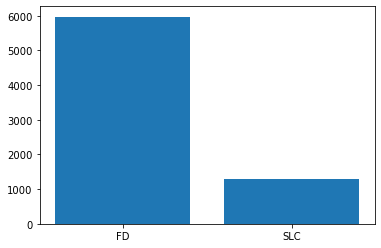

In [4]:
num = y.value_counts()
num =list(np.array(num))
names = ['FD', 'SLC']

plt.figure()
plt.bar(names, num)

# ML models

### 1. All features

In [5]:
X_train, X_test, y_train, y_test = data_preparation.split_data(X, y, test_size=0.2, random_state=123)

train = 0

if train==1:
    # training
    train_LR = -time.time()
    LR(X_train, y_train, normalize=False, save_model='\\SE_identification\\classification_models\\lr_model.pickle', save_param='\\SE_identification\\classification_models\\lr_parametres.pickle')
    train_LR += time.time()
    print('LR')

    train_KNN = -time.time()
    KNN(X_train, y_train, normalize=False, save_model='\\SE_identification\\classification_models\\knn_model.pickle', save_param='\\SE_identification\\classification_models\\knn_parametres.pickle')
    train_KNN += time.time()
    print('KNN')

    train_RF = -time.time()
    RF(X_train, y_train, normalize=False, save_model='\\SE_identification\\classification_models\\rf_model.pickle', save_param='\\SE_identification\\classification_models\\rf_parametres.pickle')
    train_RF += time.time()
    print('RF')
    
    train_XGB = -time.time()
    XGB(X_train, y_train, normalize=False, save_model='\\SE_identification\\classification_models\\xgb_model.pickle', save_param='\\SE_identification\\classification_models\\xgb_parametres.pickle')
    train_XGB += time.time()
    print('XGB')
    
    train_time = data_preparation.to_dict(train_LR, train_KNN, train_RF, train_XGB)
    data_preparation.save_model(train_time, 'time/train_time')
    
train_time = data_preparation.load_model('time/train_time')
    
# load models
lr = pickle.load(open(module_path + '\\multi_attack\\SE_identification\\classification_models\\lr_model.pickle', 'rb'))
knn = pickle.load(open(module_path + '\\multi_attack\\SE_identification\\classification_models\\knn_model.pickle', 'rb'))
rf = pickle.load(open(module_path + '\\multi_attack\\SE_identification\\classification_models\\rf_model.pickle', 'rb'))
xgb = pickle.load(open(module_path + '\\multi_attack\\SE_identification\\classification_models\\xgb_model.pickle', 'rb'))
    
# load parameters
lr_param = pickle.load(open(module_path + '\\multi_attack\\SE_identification\\classification_models\\lr_parametres.pickle', 'rb'))
knn_param = pickle.load(open(module_path + '\\multi_attack\\SE_identification\\classification_models\\knn_parametres.pickle', 'rb'))
rf_param = pickle.load(open(module_path + '\\multi_attack\\SE_identification\\classification_models\\rf_parametres.pickle', 'rb'))
xgb_param = pickle.load(open(module_path + '\\multi_attack\\SE_identification\\classification_models\\xgb_parametres.pickle', 'rb'))
    
# prediction
test_LR = -time.time()
y_pred_lr = lr.predict(X_test)
test_LR += time.time()
    
test_KNN = -time.time()
y_pred_knn = knn.predict(X_test)
test_KNN += time.time()
    
test_RF = -time.time()
y_pred_rf = rf.predict(X_test)
test_RF += time.time()
    
test_XGB = -time.time()
y_pred_xgb = xgb.predict(X_test)
test_XGB += time.time()
       
# F1 score
macro_f1_lr = f1_score(y_test, y_pred_lr)
macro_f1_knn = f1_score(y_test, y_pred_knn)
macro_f1_rf = f1_score(y_test, y_pred_rf)
macro_f1_xgb = f1_score(y_test, y_pred_xgb)

LR
KNN
RF
XGB


In [6]:
print('##############')
print('F1 score:')
print('LR', macro_f1_lr*100) 
print('KNN', macro_f1_knn*100)
print('RF', macro_f1_rf*100)
print('XGB', macro_f1_xgb*100)

print('##############')
print('Training Time:')
print('LR', train_time['LR'], 'sec')
print('KNN', train_time['KNN'], 'sec')
print('RF', train_time['RF'], 'sec')
print('XGB', train_time['XGB'], 'sec')

print('##############')
print('Testing Time:')
print('LR', test_LR, 'sec')
print('KNN', test_KNN, 'sec')
print('RF', test_RF, 'sec')
print('XGB', test_XGB, 'sec')

print('##############')
print('Parameters:')
print('LR:', lr_param)
print('KNN:', knn_param)
print('RF:', rf_param)
print('XGB:', xgb_param)

##############
F1 score:
LR 96.62027833001989
KNN 100.0
RF 100.0
XGB 100.0
##############
Training Time:
LR 420.9834232330322 sec
KNN 24.525036334991455 sec
RF 474.59105038642883 sec
XGB 535.5834612846375 sec
##############
Testing Time:
LR 0.014734745025634766 sec
KNN 0.2626688480377197 sec
RF 0.1720881462097168 sec
XGB 0.015099287033081055 sec
##############
Parameters:
LR: ['newton-cg', 'none', 8.326365835633833]
KNN: [3, 'distance']
RF: [746, 9, 3, 3]
XGB: [301, 3, 0.13578919045928203, 0.7438908374929156, 0.8246715962541505]


-------------------

### MRMR

In [7]:
selected_features = mrmr.mrmr_classif(X, y, K = 100 , relevance = 'mi', redundancy = 'spearman', denominator = 'mean')

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 423.02it/s]


### 2. Best N features

In [8]:
N = 30
best_features = selected_features[:N]
best_features

['Q8 - FM - EKF',
 'Q4 - EM - EKF',
 'ph3 - FS - EKF',
 'Q8 - NI',
 'ph5 - FS - EKF',
 'ph7 - FS - EKF',
 'ph8 - FS - EKF',
 'ph4 - FS - EKF',
 'ph2 - FS - EKF',
 'ph9 - FS - EKF',
 'ph10 - FS - EKF',
 'Q8 - SCADA',
 'ph14 - FS - EKF',
 'ph11 - FS - EKF',
 'ph6 - FS - EKF',
 'ph13 - FS - EKF',
 'ph12 - FS - EKF',
 'P7 - EM - EKF',
 'Q3 - FM - EKF',
 'Q3 - SCADA',
 'P12 - EM - EKF',
 'Q4 - SCADA',
 'P11 - EM - EKF',
 'P10 - EM - EKF',
 'P2 - NI',
 'Q9 - SCADA',
 'P5 - EM - EKF',
 'P6 - SCADA',
 'Q5 - SCADA',
 'Q11 - SCADA']

In [9]:
X_best = X.loc[:, best_features] 
X_train, X_test, y_train, y_test = data_preparation.split_data(X_best, y, test_size=0.2, random_state=123)

train = 1

if train==1:
    train_LR = -time.time()
    LR(X_train, y_train, normalize=False, save_model='\\SE_identification\\classification_models\\lr_model_mrmr.pickle', save_param='\\SE_identification\\classification_models\\lr_parametres_mrmr.pickle')
    train_LR += time.time()
    print('LR')

    train_KNN = -time.time()
    KNN(X_train, y_train, normalize=False, save_model='\\SE_identification\\classification_models\\knn_model_mrmr.pickle', save_param='\\SE_identification\\classification_models\\knn_parametres_mrmr.pickle')
    train_KNN += time.time()
    print('KNN')

    train_RF = -time.time()
    RF(X_train, y_train, normalize=False, save_model='\\SE_identification\\classification_models\\rf_model_mrmr.pickle', save_param='\\SE_identification\\classification_models\\rf_parametres_mrmr.pickle')
    train_RF += time.time()
    print('RF')

    train_XGB = -time.time()
    XGB(X_train, y_train, normalize=False, save_model='\\SE_identification\\classification_models\\xgb_model_mrmr.pickle', save_param='\\SE_identification\\classification_models\\xgb_parametres_mrmr.pickle')
    train_XGB += time.time()
    print('XGB')
    
    train_time = data_preparation.to_dict(train_LR, train_KNN, train_RF, train_XGB)
    data_preparation.save_model(train_time, 'time/train_time_mrmr')


train_time = data_preparation.load_model('time/train_time_mrmr')

# load models
lr = pickle.load(open(module_path + '\\multi_attack\\SE_identification\\classification_models\\lr_model_mrmr.pickle', 'rb'))
knn = pickle.load(open(module_path + '\\multi_attack\\SE_identification\\classification_models\\knn_model_mrmr.pickle', 'rb'))
rf = pickle.load(open(module_path + '\\multi_attack\\SE_identification\\classification_models\\rf_model_mrmr.pickle', 'rb'))
xgb = pickle.load(open(module_path + '\\multi_attack\\SE_identification\\classification_models\\xgb_model_mrmr.pickle', 'rb'))

# load parameters
lr_param = pickle.load(open(module_path + '\\multi_attack\\SE_identification\\classification_models\\lr_parametres_mrmr.pickle', 'rb'))
knn_param = pickle.load(open(module_path + '\\multi_attack\\SE_identification\\classification_models\\knn_parametres_mrmr.pickle', 'rb'))
rf_param = pickle.load(open(module_path + '\\multi_attack\\SE_identification\\classification_models\\rf_parametres_mrmr.pickle', 'rb'))
xgb_param = pickle.load(open(module_path + '\\multi_attack\\SE_identification\\classification_models\\xgb_parametres_mrmr.pickle', 'rb'))


# prediction
test_LR = -time.time()
y_pred_lr = lr.predict(X_test)
test_LR += time.time()

test_KNN = -time.time()
y_pred_knn = knn.predict(X_test)
test_KNN += time.time()

test_RF = -time.time()
y_pred_rf = rf.predict(X_test)
test_RF += time.time()

test_XGB = -time.time()
y_pred_xgb = xgb.predict(X_test)
test_XGB += time.time()

# F1 score
macro_f1_lr = f1_score(y_test, y_pred_lr)
macro_f1_knn = f1_score(y_test, y_pred_knn)
macro_f1_rf = f1_score(y_test, y_pred_rf)
macro_f1_xgb = f1_score(y_test, y_pred_xgb)

LR
KNN
RF
XGB


In [10]:
print('##############')
print('F1 score:')
print('LR', macro_f1_lr*100) 
print('KNN', macro_f1_knn*100)
print('RF', macro_f1_rf*100)
print('XGB', macro_f1_xgb*100)

print('##############')
print('Training Time:')
print('LR', train_time['LR'], 'sec')
print('KNN', train_time['KNN'], 'sec')
print('RF', train_time['RF'], 'sec')
print('XGB', train_time['XGB'], 'sec')

print('##############')
print('Testing Time:')
print('LR', test_LR, 'sec')
print('KNN', test_KNN, 'sec')
print('RF', test_RF, 'sec')
print('XGB', test_XGB, 'sec')

print('##############')
print('Parameters:')
print('LR:', lr_param)
print('KNN:', knn_param)
print('RF:', rf_param)
print('XGB:', xgb_param)

##############
F1 score:
LR 67.72277227722773
KNN 97.24409448818896
RF 100.0
XGB 99.80506822612087
##############
Training Time:
LR 37.58631634712219 sec
KNN 17.7583065032959 sec
RF 185.62973546981812 sec
XGB 93.05474185943604 sec
##############
Testing Time:
LR 0.0 sec
KNN 0.2990705966949463 sec
RF 0.15623211860656738 sec
XGB 0.01563239097595215 sec
##############
Parameters:
LR: ['newton-cg', 'none', 8.326365835633833]
KNN: [6, 'uniform']
RF: [734, 8, 3, 6]
XGB: [446, 13, 0.027101626262247512, 0.8779244682740692, 0.6973607988150243]


-----------------------